## **Data Dictionary:** 
- **Member_number:** Customer Id  
- **Date:** Date of purchase
- **itemDescription:** Description of product purchased


## **Flow of Execution:**

1. Loading Necessary Packages
2. Loading dataset
3. Data Pre-Processing
4. Performing EDA
5. Apriori Implementation
6. Result Customization

## **Step - 1 :** Loading Necessary Packages

In [2]:
%pip install apyori ## Installing apriori library

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '##'

[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting

## **Step - 2 :** Loading dataset

In [4]:
df = pd.read_csv("Groceries_dataset2.csv") ## Loading dataset
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,bread
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [5]:
df.info() # Checking data type information for validation purposes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Interpretation: - No Null values should be present 

In [6]:
df.isnull().sum().sort_values(ascending=False) ## Checking availability of NULL values

Member_number      0
Date               0
itemDescription    0
dtype: int64

Note - No NULLs present

## **Step - 3 :** Data Pre-Processing

In [7]:
df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10980\2319157033.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime


In [8]:
df.head(10) ## Schema check

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
5,4941,2015-02-14,rolls/buns
6,4501,2015-08-05,other vegetables
7,3803,2015-12-23,bread
8,2762,2015-03-20,whole milk
9,4119,2015-12-02,tropical fruit


## **Step - 4 :** Performing EDA (Exploratory data analysis)

### **Step - 4.1 :** Top 10 Sold Items

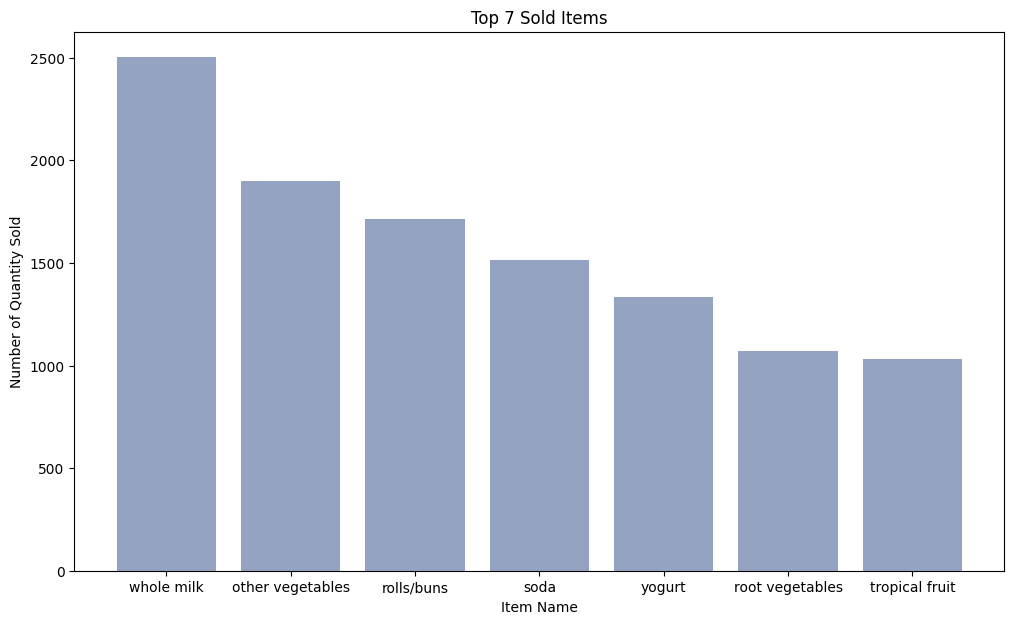

In [9]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(7)

## Declaring variables

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(12,7))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 7 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()


### **Step - 4.2 :** Month-Year Sales

In [10]:
df_date=df.set_index(['Date']) ## Setting date as index for plotting purpose
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

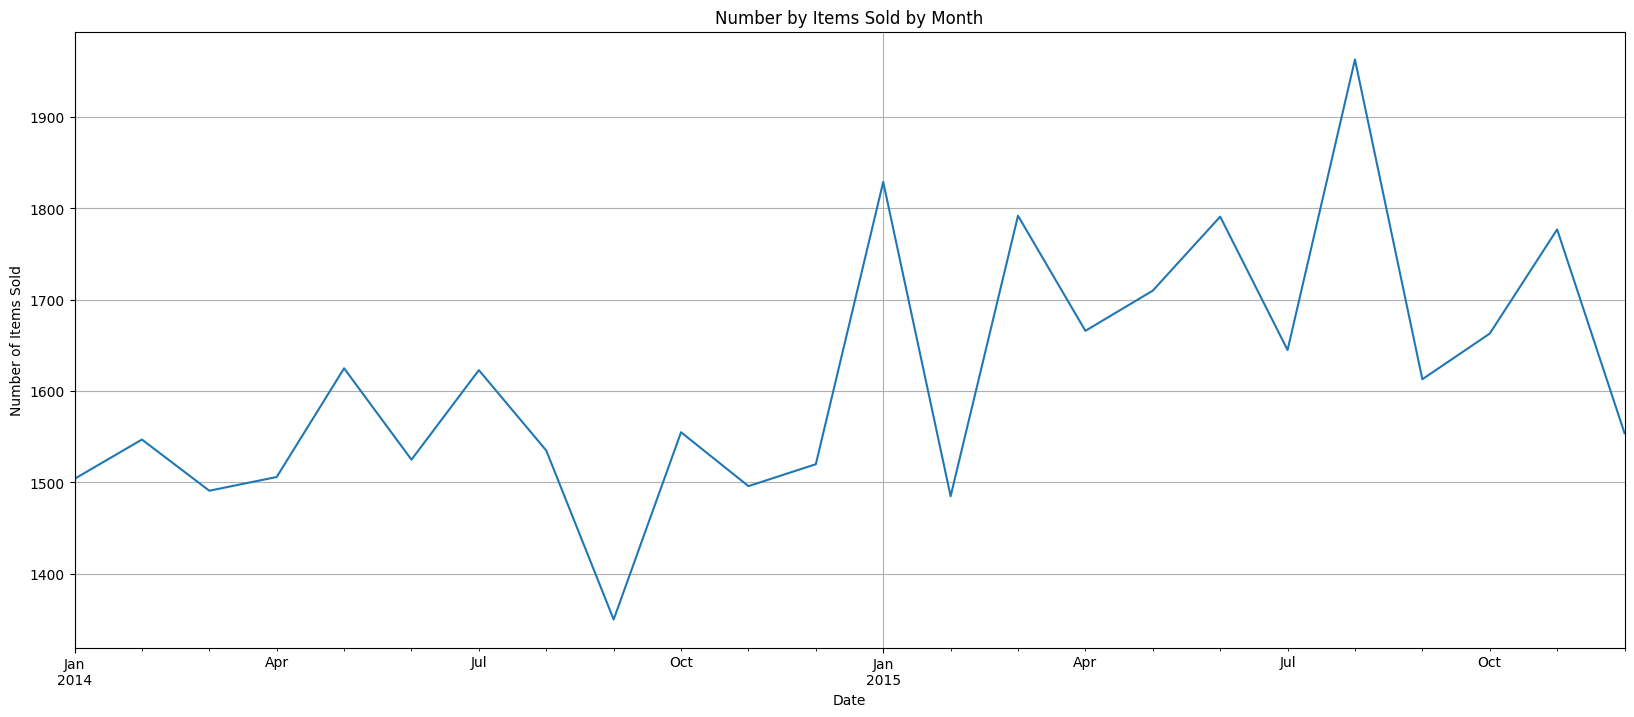

In [11]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

## **Step - 5 :** Apriori Implementation

Apriori is an algorithm for frequent itemset mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent itemsets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

![](https://lh4.googleusercontent.com/ODPqvTXuc6ZnqnvjcIKaVqKQvvPAV9oqqqrNWvOgJl54Iw-qBSke0UdBOqRu9i0Awj6bEfM7Jedz4f9t8zORrJwrcyQv3OWlcCvI3ZAJjUVEt-gBbvrzJr1XjXAgMqcyu9vvU3y66rkizWjJzQ)

### **Step - 5.1 :** Data Preparation

In [12]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) ## Selecting only required variables for modelling
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Removing white spaces if any
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


### **Step - 5.2 :** Create Transaction list

In [13]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] ## Combing all the items in list format for each cutomer

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10980\3930265692.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] ## Combing all the items in list format for each cutomer


### **Step - 5.3 :** Train Model

In [14]:
from apyori import apriori ## Importing apriori package
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 3) ## Model Creation

In [15]:
results = list(rules) ## Storing results in list format for better visualisation
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

## **Step - 6 :** Result Customization

In [16]:
## Creating user-defined function for arranging the results obtained from model into readable format

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [17]:
resultsinDataFrame.nlargest(n=20, columns="Confidence") ## Showing best possible scenarios

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
315,waffles,yogurt,0.003592,0.933333,3.301391
305,white bread,root vegetables,0.002309,0.818182,3.547578
310,sweet spreads,root vegetables,0.002052,0.727273,3.153403
204,herbs,sausage,0.002309,0.692308,3.360667
114,candles,canned beer,0.002309,0.600000,3.631677
179,specialty chocolate,citrus fruit,0.002309,0.600000,3.239335
129,pasta,pastry,0.002052,0.571429,3.218827
242,pasta,pastry,0.002052,0.571429,3.218827
298,seasonal products,shopping bags,0.002052,0.571429,3.395470
94,pasta,pastry,0.002309,0.562500,3.168533


In [18]:
product_dictionary = {}
for result in results:
    x = tuple(result[2][0][0])[0]
    y = tuple(result[2][0][1])[0]
    product_dictionary[x] = y

In [19]:
# open file for writing
f = open("pr2.txt","w")

# write file
f.write( str(product_dictionary) )

# close file
f.close()